<a href="https://colab.research.google.com/github/WanDz03/SMJE4313/blob/main/Wan_otsu_and_riddler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **In this code, we automatically compute the threshold value of T by using Otsu’s and Riddler-Calvard method.**

First we need to mount our code with google drive.

In [1]:
# To mount code with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Manually install library mahotas.

In [2]:
# Task 1
# Manually install library mahotas using !pip
#!pip install mahotas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 36.3 MB/s eta 0:00:00


Import all the package that we will use for the code.

In [21]:
# Import the necessary packages
from __future__ import print_function
import numpy as np
import argparse
#import mahotas
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import math
import time

Set the path for the image that we will use for testing the code.

When you mount the code, folder **"drive"** will appear on the left screen when you click the **"file"** symbol. Then you just need to find the image in your drive and right click on that image.

A pop up will show some list then just click **"copy path"**. After that you just need to paste the path here.

In [32]:
# Construct the argument parser and parse the arguments
args = {
	# Task 1
	"image": "/content/drive/MyDrive/Colab Notebooks/SMJE4313 Image Processing/image/giraffe.jpg"
}
print (args)


{'image': '/content/drive/MyDrive/Colab Notebooks/SMJE4313 Image Processing/image/giraffe.jpg'}


Now that we have the path to the image, we can load it off the disk using the cv2.imread function on Line 2. The cv2.imread function returns a NumPy array representing the image.

On line 3, we convert the image into grayscale and apply gaussian blur on line 4.

Then, displaying the actual image on our screen. The parameter is a reference to the image we convert before.

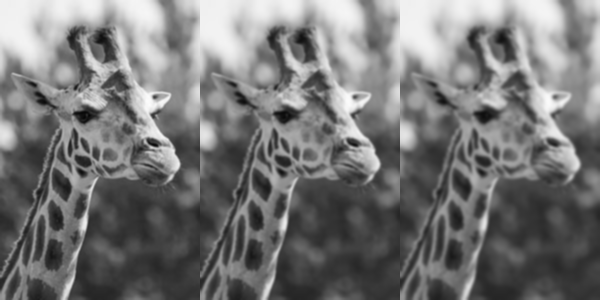

In [33]:
# Task 3
# Load the image :
img = cv2.imread(args["image"])

# Task 4
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Task 5
# Apply gaussian blur with size 5x5
blurred = np.hstack([cv2.GaussianBlur(gray, (3, 3), 0),
                     cv2.GaussianBlur(gray, (5, 5), 0),
                     cv2.GaussianBlur(gray, (7, 7), 0)
])

cv2_imshow(blurred)

OpenCV provides methods to use Otsu's thresholding, but the mahotas implementation is more 'Pythonic'. Otsu's method assumes that are two 'peaks' in the grayscale histogram. It finds these peaks, and then returns a value we should threshold on.

In [34]:
def otsu_thresholding(image):
    image = tf.convert_to_tensor(image, name="image")

    rank = image.shape.rank
    if rank != 2 and rank != 3:
        raise ValueError("Image should be either 2 or 3-dimensional.")

    if image.dtype!=tf.int32:
        image = tf.cast(image, tf.int32)

    r, c = image.shape
    hist = tf.math.bincount(image, dtype=tf.int32)

    if len(hist)<256:
        hist = tf.concat([hist, [0]*(256-len(hist))], 0)

    current_max, threshold = 0, 0
    total = r * c

    spre = [0]*256
    sw = [0]*256
    spre[0] = int(hist[0])

    for i in range(1,256):
        spre[i] = spre[i-1] + int(hist[i])
        sw[i] = sw[i-1]  + (i * int(hist[i]))

    for i in range(256):
        if total - spre[i] == 0:
            break

        meanB = 0 if int(spre[i])==0 else sw[i]/spre[i]
        meanF = (sw[255] - sw[i])/(total - spre[i])
        varBetween = (total - spre[i]) * spre[i] * ((meanB-meanF)**2)

        if varBetween > current_max:
            current_max = varBetween
            threshold = i

    final = tf.where(image>threshold,255,0)
    return final

tf.Tensor(
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]], shape=(300, 600), dtype=int32)


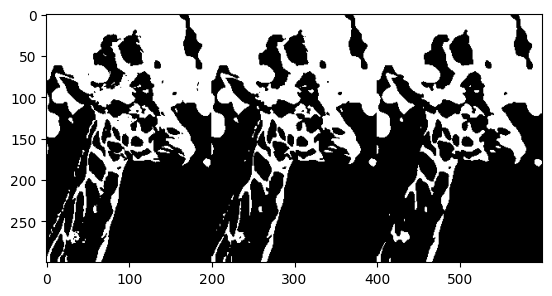

In [49]:
# Task 6
# Show image thresh using otsu method
#blurred = (blurred*255).astype('uint8')
#T = mahotas.otsu(blurred)
T = otsu_thresholding(blurred)
plt.imshow(T, cmap="gray")
print(T)


#thresh = img.copy()
#thresh[thresh > T] = 255
#thresh[thresh < 255] = 0
#thresh = cv2.bitwise_not(thresh)
#cv2_imshow(thresh)

Applying the thresholding is accomplished on Lines 4-7. First, we make a copy of our grayscale image so that we have an image to threshold. Line 5 then makes any values greater than T white, whereas Line 6 makes all remaining pixels that are not white into black pixels. We then invert our threshold by using cv2.bitwise_not.

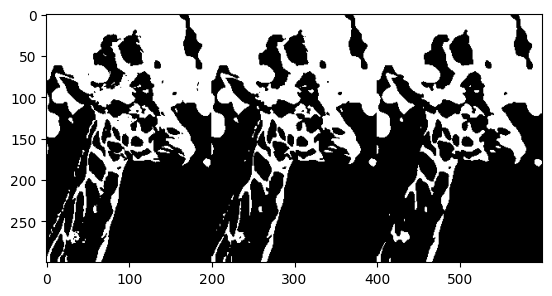

In [48]:
# Applying the threshold can be done using NumPy, where values
# smaller than the threshold are set to zero, and values above
# the threshold are set to 255 (white).
#T = mahotas.thresholding.otsu(blurred)
#print(T)
#thresh = image.copy()
#thresh[thresh > T] = 255
#thresh[thresh < 255] = 0
#thresh = cv2.bitwise_not(thresh)

Another method to keep in mind when ﬁnding optimal values for T is the Riddler-Calvard method. Just as in Otsu’s method, the Riddler-Calvard method also computes an optimal value of 137 for T. We apply this method on Line 2 using the rc function in mahotas.thresholding. Finally, the actual thresholding of the image takes place on Lines 4-7.

In [50]:
# An alternative is to use the Riddler-Calvard method
# Task 7
# Show image thresh using Riddler-Calvard method
#T = mahotas.thresholding.rc(blurred)
#print("Riddler-Calvard: {}".format(T))
#thresh[thresh > T] = 255
#thresh[thresh < 255] = 0
#thresh = cv2.bitwise_not(thresh)
def riddler_calvard_thresholding(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Set initial threshold values
    prev_threshold = -1
    threshold = 128

    while prev_threshold != threshold:
        # Separate the image into two regions based on the threshold
        below_threshold = gray < threshold
        above_threshold = gray >= threshold

        # Calculate the mean values for the two regions
        mean_below = np.mean(gray[below_threshold])
        mean_above = np.mean(gray[above_threshold])

        # Update the threshold
        prev_threshold = threshold
        threshold = 0.5 * (mean_below + mean_above)

    # Apply the final threshold to obtain the binary image
    _, binary = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)

    return binary

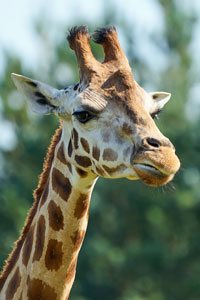

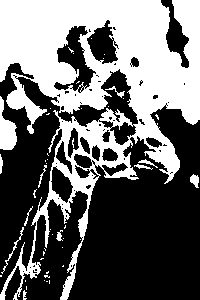

In [53]:
thresholded_image = riddler_calvard_thresholding(img)
cv2_imshow(img)
cv2_imshow(thresholded_image)